In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression 
data2 = pd.read_csv("UHG_SAS_bds_anu1.csv")
data1 = pd.DataFrame(pd.read_csv("d.csv")[['MEDICARE_HICN_CD','pxcreatedate']])
#data1 = data[:,[6,7,11,25,26,27,54,55,56,57,58,59,60,67,68,69,70,71,207,208,209,210,362,363,364,365,366]]

data = pd.merge(data2,data1, on ="MEDICARE_HICN_CD", how ="left")

data.columns
data1.shape, data2.shape, data.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((67903, 2), (65808, 9), (67903, 10))

In [2]:
data.loc[:,'pxcreatedate']
data['year'] = pd.DatetimeIndex(data['pxcreatedate']).year
data['month'] = pd.DatetimeIndex(data['pxcreatedate']).month
grouped =data.groupby('month').size()
#grouped

"""2     4509
3     7667
4     6476
5     7117
6     6952
7     6086
8     6503
9     4428
10    6936
11    6824
12    4405
"""
data.columns


data = data.replace(np.NaN,0)

print(data.isnull().sum())
data.columns
data1 = data.iloc[:,np.r_[1:9,10:12]]
data1.columns
print(data1.isnull().sum(), data1.shape)

MEDICARE_HICN_CD            0
f_optim                     0
n_180_bcs_opt               0
n_360_bcs_refuse_olt        0
age_imp                     0
TOT_RX_CLM_90_imp           0
MM_HH_n_21_a4m_assist_m     0
f_spanish                   0
HH_n_360_a4m_opt_sum_add    0
pxcreatedate                0
year                        0
month                       0
dtype: int64
f_optim                     0
n_180_bcs_opt               0
n_360_bcs_refuse_olt        0
age_imp                     0
TOT_RX_CLM_90_imp           0
MM_HH_n_21_a4m_assist_m     0
f_spanish                   0
HH_n_360_a4m_opt_sum_add    0
year                        0
month                       0
dtype: int64 (67903, 10)


In [3]:
print(data1.groupby('f_optim').size())

#data1 = data.iloc[:,np.r_[9,11,21,22,25:31,35,38:42,52:200]][data.month <=7]
data11 = data1[data1.month <=7]
data2 = data1[data1.month ==8]
data3 = data1[(data1.month >=8) & (data1.month <=9)]
data4 = data1[(data1.month >=8) & (data1.month <=10)]
data5 = data1[(data1.month >=8) & (data1.month <=11)]
data6 = data1[(data1.month >=8) & (data1.month <=12)]
data11.shape, data2.shape
#data1.columns



f_optim
0    63862
1     4041
dtype: int64


((38807, 10), (6503, 10))

In [ ]:
####Model built 
from sklearn.neural_network import MLPClassifier 
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn import datasets,linear_model,metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

###Main Training data
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(data11.iloc[:,1:], data11.iloc[:,0],test_size = 0.3)
###Incremental Data
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(data2.iloc[:,1:], data2.iloc[:,0],test_size = 0.3)
train_X3, test_X3, train_Y3, test_Y3 = train_test_split(data3.iloc[:,1:], data3.iloc[:,0],test_size = 0.3)
train_X4, test_X4, train_Y4, test_Y4 = train_test_split(data4.iloc[:,1:], data4.iloc[:,0],test_size = 0.3)
train_X5, test_X5, train_Y5, test_Y5 = train_test_split(data5.iloc[:,1:], data5.iloc[:,0],test_size = 0.3)
train_X6, test_X6, train_Y6, test_Y6 = train_test_split(data6.iloc[:,1:], data6.iloc[:,0],test_size = 0.3)

#### combined 30%-30% of both mini batches
comb_X2,comb_Y2 = test_X1.append(test_X2), test_Y1.append(test_Y2)
comb_X3,comb_Y3 = test_X1.append(test_X3), test_Y1.append(test_Y3)
comb_X4,comb_Y4 = test_X1.append(test_X4), test_Y1.append(test_Y4)
comb_X5,comb_Y5 = test_X1.append(test_X5), test_Y1.append(test_Y5)
comb_X6,comb_Y6 = test_X1.append(test_X6), test_Y1.append(test_Y6)

train_X11 = preprocessing.scale(train_X1)
test_X11 = preprocessing.scale(test_X1)

params = {
    "loss" : ['log'],
    "alpha" : [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4],
    "penalty" : ['l2'],
    "n_iter" :[1000]
}
      
clf = SGDClassifier()
clf = GridSearchCV(clf, param_grid=params)
clf1 = clf.fit(train_X1,train_Y1)
print(clf1.best_estimator_, clf1.best_score_)

clf2 =clf.fit(train_X11,train_Y1)
print(clf2.best_estimator_, clf2.best_score_)

###accuracy of train and test of mini batch 1
print("Accuracy for (train,test)-" , accuracy_score(train_Y1,clf1.predict(train_X1)), accuracy_score(test_Y1,clf1.predict(test_X1)))
print("Confusion Matrix for Mini Batch1-", confusion_matrix(test_Y1,clf1.predict(test_X1)))

###accuracy of train and test of mini batch 1
print("Accuracy for (train,test)-" , accuracy_score(train_Y1,clf2.predict(train_X11)), accuracy_score(test_Y1,clf2.predict(test_X11)))
print("Confusion Matrix for Mini Batch1-", confusion_matrix(test_Y1,clf2.predict(test_X11)))


In [5]:
###Normalization 
##Oversampling 
#hyperparameter tuning 
clf.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__alpha', 'estimator__average', 'estimator__class_weight', 'estimator__epsilon', 'estimator__eta0', 'estimator__fit_intercept', 'estimator__l1_ratio', 'estimator__learning_rate', 'estimator__loss', 'estimator__n_iter', 'estimator__n_jobs', 'estimator__penalty', 'estimator__power_t', 'estimator__random_state', 'estimator__shuffle', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  4.1min remaining:  8.3min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  5.5min remaining:  6.8min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  5.5min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  5.5min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  5.5min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.5min finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.3min finished


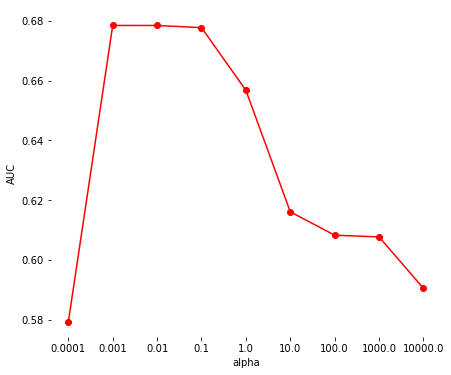

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  4.4min remaining:  8.9min


In [ ]:
###Hyperparameter tuning 

##pip install parfit - anaconda
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

from parfit import bestFit
import parfit as pf

model =SGDClassifier()
grid ={ 
'alpha' : [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4], #learning rate 
'n_iter': [1000], #epoch
'loss'  : ['log'], #logistic regression 
'penalty':['l2'], 
'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)


bestModel, bestScore, allModels, allScores = pf.bestFit(model, paramGrid, train_X1, train_Y1, test_X1, test_Y1, 
                                                        metric = roc_auc_score, greater_is_better = True, scoreLabel = "AUC")

bestModel1, bestScore1, allModels1, allScores1 = pf.bestFit(model, paramGrid, train_X11, train_Y1, test_X11, test_Y1, 
                                                        metric = roc_auc_score, greater_is_better = True, scoreLabel = "AUC")

print(bestModel, bestScore)
print(bestModel1, bestScore1)


In [7]:

print("Accuracy for (train,test)-" , accuracy_score(train_Y1,bestModel.predict(train_X1)), accuracy_score(test_Y1,bestModel.predict(test_X1)))
print("Confusion Matrix for Mini Batch1-", confusion_matrix(test_Y1,bestModel.predict(test_X1)))

Accuracy for (train,test)- 0.304447062288 0.306965558705
Confusion Matrix for Mini Batch1- [[2946 7979]
 [  90  628]]


In [26]:
#### Incremental for 1 month

bestModel.partial_fit(train_X2,train_Y2)
###accuracy of train and test of mini batch 2
print("Accuracy with Mini Batch2 (train,test)-" , accuracy_score(train_Y2,bestModel.predict(train_X2)), accuracy_score(test_Y2,bestModel.predict(test_X2)))
confusion_matrix(comb_Y2,bestModel.predict(comb_X2))
#print(clf)

Accuracy with Mini Batch2 (train,test)- 0.929042179262 0.928241927217


array([[12555,   172],
       [  812,    55]])

In [16]:
#### Incremental for 2 month
bestModel.partial_fit(train_X3,train_Y3)
###accuracy of train and test of mini batch 2
print("Accuracy with Mini Batch2 (train,test)-" , accuracy_score(train_Y3,bestModel.predict(train_X3)), accuracy_score(comb_Y3,bestModel.predict(comb_X3)))
confusion_matrix(comb_Y3,bestModel.predict(comb_X3))

Accuracy with Mini Batch2 (train,test)- 0.0586851391975 0.0627889834484


array([[    0, 13986],
       [    0,   937]])

In [ ]:
dir(clf.fit)

In [ ]:
train_X1.iloc[:,5:].describe



In [ ]:
string1 ="ald"
string2 ="dsf"
def d(string1,string2):
    ls1 =list(string1)
    ls2 =list(string2)
    if (ls1==ls2):
        print("anagram")
d(string1,string2)   